# <center> ETL YELP

__________________

### Cargar librerías

In [1]:
import os
import pandas as pd
import json
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

_________________
____________________

## Archivo CHEKIN.JSON

- Cargar datos al dataframe

In [19]:
#Funcion para abrir chekin de yelp
def abrir_Archivo_json(archivo):
    merged_data = []  # Lista para almacenar los objetos JSON combinados

    with open(archivo) as file:
        for line in file:
            try:
                obj = json.loads(line)
                merged_data.append(obj)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en el archivo {archivo}: {str(e)}")

    df = pd.DataFrame(merged_data)  # Crear DataFrame a partir de los objetos JSON
    return df

In [20]:
# Cargamos archivo
archivo = 'YELP\checkin.json'
df_checkin_yelp = abrir_Archivo_json(archivo)

In [21]:
df_checkin_yelp

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


- Revision de nulos

In [22]:
df_checkin_yelp.isnull().sum()

business_id    0
date           0
dtype: int64

- Revision de duplicados

In [23]:
df_checkin_yelp.duplicated().sum()

0

- Desanidado de fecha y hora

In [24]:
desanidados = []

for _, row in df_checkin_yelp.iterrows():
    business_id = row['business_id']
    dates = row['date'].split(', ')
    for date in dates:
        time, date = date.split(' ')
        desanidados.append([business_id, time, date])

df_desanidado = pd.DataFrame(desanidados, columns=['business_id', 'date', 'hour'])

In [25]:
df_desanidado

,business_id,date,hour
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13,21:10:56
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02,22:18:06
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24,22:42:27
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24,21:36:13
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09,21:23:33
...,...,...,...
13356870,zzu6_r3DxBJuXcjnOYVdTw,2013-12-11,00:52:49
13356871,zzu6_r3DxBJuXcjnOYVdTw,2013-12-13,00:58:14
13356872,zzw66H6hVjXQEt0Js3Mo4A,2016-12-03,23:33:26
13356873,zzw66H6hVjXQEt0Js3Mo4A,2018-12-02,19:08:45


-------------

Guardamos en archivos csv

In [26]:
df_desanidado.to_csv('CSV/checkin.csv', index=False, encoding='utf-8')

_________________
____________

## Archivo USER.PARQUET

- Cargar datos al dataframe

In [27]:
archivo = "YELP/user.parquet"
df_User_yelp = pd.read_parquet(archivo)

In [28]:
df_User_yelp.isnull().sum() # Revisamos si hay valores nulos.

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

- Revision, eliminación de duplicados

In [30]:
df_User_yelp.duplicated().sum() # Revisamos si hay valores duplicados.

117700

In [31]:
df_User_yelp.drop_duplicates(inplace=True)

In [33]:
df_User_yelp = df_User_yelp.reindex(df_User_yelp.index)
df_User_yelp['id_user'] = df_User_yelp.index

In [34]:
df_User_yelp

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,id_user
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180,0
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946,1
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18,2
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9,3
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,,None,0,4.92,0,0,0,0,0,0,0,0,0,0,0,1987892
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,,None,0,5.00,0,0,0,0,0,0,0,0,0,0,0,1987893
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,,None,0,2.00,0,0,0,0,0,0,0,0,0,0,0,1987894
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,,None,0,3.00,0,0,0,0,0,0,0,0,0,0,0,1987895


- Creamos nueva tabla para conservar el id del usuario de yelp

In [35]:
dfusuario = df_User_yelp.loc[:, ["id_user",'user_id']]

In [36]:
#Renombramos la columna user_id
dfusuario.rename(columns={"user_id": "yelp_id"}, inplace=True)

In [37]:
dfusuario

,id_user,yelp_id
0,0,qVc8ODYU5SZjKXVBgXdI7w
1,1,j14WgRoU_-2ZE1aw1dXrJg
2,2,2WnXYQFK0hXEoTxPtV2zvg
3,3,SZDeASXq7o05mMNLshsdIA
4,4,hA5lMy-EnncsH4JoR-hFGQ
...,...,...
1987892,1987892,fB3jbHi3m0L2KgGOxBv6uw
1987893,1987893,68czcr4BxJyMQ9cJBm6C7Q
1987894,1987894,1x3KMskYxOuJCjRz70xOqQ
1987895,1987895,ulfGl4tdbrH05xKzh5lnog


__________

Guardamos en archivos csv

In [38]:
dfusuario.to_csv("CSV/UsuarioYelp.csv", index=False, encoding='utf-8')

_________________________

- Eliminamos la columna user_id del dataframe df_user_yelp**

In [39]:
df_User_yelp.drop(columns=['user_id'], inplace=True)

- Aplicamos transformaciones a los tipos de datos en las diferentes variables

In [40]:
df_User_yelp.info() # Informacion del DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   name                object 
 1   review_count        int64  
 2   yelping_since       object 
 3   useful              int64  
 4   funny               int64  
 5   cool                int64  
 6   elite               object 
 7   friends             object 
 8   fans                int64  
 9   average_stars       float64
 10  compliment_hot      int64  
 11  compliment_more     int64  
 12  compliment_profile  int64  
 13  compliment_cute     int64  
 14  compliment_list     int64  
 15  compliment_note     int64  
 16  compliment_plain    int64  
 17  compliment_cool     int64  
 18  compliment_funny    int64  
 19  compliment_writer   int64  
 20  compliment_photos   int64  
 21  id_user             int64  
dtypes: float64(1), int64(17), object(4)
memory usage: 348.8+ MB


In [43]:
#Cambiamos a string la variable name
df_User_yelp['name'] = df_User_yelp['name'].astype(str)

#cambiamos a tipo datetime la variable yelping_since
df_User_yelp['yelping_since'] = pd.to_datetime(df_User_yelp['yelping_since'])

#Creamos una columna año a partir de elite que devuelva una lista de años separado por comas
df_User_yelp['years'] = df_User_yelp['elite'].str.split(',')


In [44]:
#creamos un nuevo DataFrame con filas individuales para cada año y usuario
df_year = df_User_yelp[['id_user', 'years']].explode('years')

In [61]:
unique_years = df_year['years'].unique()

In [62]:
unique_years

array(['2007', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', nan, '2006',
       '2008'], dtype=object)

In [57]:
#reemplazamos valores vacios por np.nan en years
df_year['years'] = df_year['years'].replace('', np.nan)

In [60]:
#reemplazamos 20 po 2020 en years
df_year['years'] = df_year['years'].replace("20", "2020")

____

Guardamos en archivos csv

In [63]:
df_year.to_csv("CSV/Usuario_Elite.csv", index=False, encoding='utf-8')

________________

- Eliminamos las columnas elite y years del dataframe original

In [64]:
df_User_yelp.drop(columns=['elite'], inplace=True)
df_User_yelp.drop(columns=['years'], inplace=True)

In [65]:
df_User_yelp

,name,review_count,yelping_since,useful,funny,cool,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,id_user
0,Walker,585,2007-01-25 16:47:26,7217,1259,5994,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180,0
1,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946,1
2,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18,2
3,Gwen,224,2005-11-29 04:38:33,512,330,299,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9,3
4,Karen,79,2007-01-05 19:40:59,29,15,7,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,Jerrold,23,2015-01-06 00:31:31,7,0,0,None,0,4.92,0,0,0,0,0,0,0,0,0,0,0,1987892
1987893,Jane,1,2016-06-14 07:20:52,0,0,0,None,0,5.00,0,0,0,0,0,0,0,0,0,0,0,1987893
1987894,Shomari,4,2017-02-04 15:31:58,1,1,0,None,0,2.00,0,0,0,0,0,0,0,0,0,0,0,1987894
1987895,Susanne,2,2011-01-14 00:29:08,0,0,0,None,0,3.00,0,0,0,0,0,0,0,0,0,0,0,1987895


- Ponemos el id_user como primera columna

In [66]:
# Obtén el nombre de la última columna
ultima_columna = df_User_yelp.columns[-1]

# Crea una nueva columna llamada 'id_user' con los valores de la última columna
df_User_yelp.insert(0, 'id_user1', df_User_yelp[ultima_columna])

# Elimina la última columna original
df_User_yelp = df_User_yelp.drop(columns=[ultima_columna])

# Muestra el DataFrame resultante
df_User_yelp


,id_user1,name,review_count,yelping_since,useful,funny,cool,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,Walker,585,2007-01-25 16:47:26,7217,1259,5994,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,1,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,3,Gwen,224,2005-11-29 04:38:33,512,330,299,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,4,Karen,79,2007-01-05 19:40:59,29,15,7,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,1987892,Jerrold,23,2015-01-06 00:31:31,7,0,0,None,0,4.92,0,0,0,0,0,0,0,0,0,0,0
1987893,1987893,Jane,1,2016-06-14 07:20:52,0,0,0,None,0,5.00,0,0,0,0,0,0,0,0,0,0,0
1987894,1987894,Shomari,4,2017-02-04 15:31:58,1,1,0,None,0,2.00,0,0,0,0,0,0,0,0,0,0,0
1987895,1987895,Susanne,2,2011-01-14 00:29:08,0,0,0,None,0,3.00,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# Renombra la columna "id_user1" a "id_user"
df_User_yelp = df_User_yelp.rename(columns={'id_user1': 'id_user'})

# Muestra el DataFrame resultante
df_User_yelp


,id_user,name,review_count,yelping_since,useful,funny,cool,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,Walker,585,2007-01-25 16:47:26,7217,1259,5994,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,1,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,3,Gwen,224,2005-11-29 04:38:33,512,330,299,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,4,Karen,79,2007-01-05 19:40:59,29,15,7,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,1987892,Jerrold,23,2015-01-06 00:31:31,7,0,0,None,0,4.92,0,0,0,0,0,0,0,0,0,0,0
1987893,1987893,Jane,1,2016-06-14 07:20:52,0,0,0,None,0,5.00,0,0,0,0,0,0,0,0,0,0,0
1987894,1987894,Shomari,4,2017-02-04 15:31:58,1,1,0,None,0,2.00,0,0,0,0,0,0,0,0,0,0,0
1987895,1987895,Susanne,2,2011-01-14 00:29:08,0,0,0,None,0,3.00,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# Elimina la columna "friends"
df_User_yelp = df_User_yelp.drop(columns=['friends'])

# Muestra el DataFrame resultante
df_User_yelp


,id_user,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,Walker,585,2007-01-25 16:47:26,7217,1259,5994,267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,1,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2,Steph,665,2008-07-25 10:41:00,2086,1010,1003,52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,3,Gwen,224,2005-11-29 04:38:33,512,330,299,28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,4,Karen,79,2007-01-05 19:40:59,29,15,7,1,3.54,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,1987892,Jerrold,23,2015-01-06 00:31:31,7,0,0,0,4.92,0,0,0,0,0,0,0,0,0,0,0
1987893,1987893,Jane,1,2016-06-14 07:20:52,0,0,0,0,5.00,0,0,0,0,0,0,0,0,0,0,0
1987894,1987894,Shomari,4,2017-02-04 15:31:58,1,1,0,0,2.00,0,0,0,0,0,0,0,0,0,0,0
1987895,1987895,Susanne,2,2011-01-14 00:29:08,0,0,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0


_______________

Guardamos en archivos csv

In [70]:
df_User_yelp.to_csv("CSV/Usuario_yelp.csv", index=False, encoding='utf-8')

______________________

## Archivo BUSINESS.PKL

- Cargar datos al dataframe

In [88]:
df_business= pd.read_pickle('YELP/business.pkl')

- Visualizamos los datos

In [124]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,State
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,California
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",Missouri
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Arizona
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Pennsylvania
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",Pennsylvania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...",Alberta
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...",Tennessee
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None,Indiana
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",Illinois


- Eliminamos las columnas duplicadas y sin datos

In [89]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()] # Eliminamos las columnas duplicadas.

- Corregimos los valores de la columna state

In [90]:
# Número de filas a desplazar hacia arriba
num_rows = 3

# Desplazar la columna hacia arriba
df_business["state"] = df_business["state"].shift(-num_rows) # Desplazamos la columna state.

In [91]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


Verificamos valores null en la columna state

In [92]:
df_no_state = df_business[df_business['state'].isna()]
df_no_state

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,None,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,None,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."
150345,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,None,33572,27.771002,-82.39491,4.5,9,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19..."


Cambiamos esos valores

In [93]:
df_business.loc[150343, 'state'] = 'IN'
df_business.loc[150344, 'state'] = 'IL'
df_business.loc[150345, 'state'] = 'FL'

- Valores de la columna state

In [125]:
valores_unicos_state = df_business['state'].unique()
valores_unicos_state

array(['CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'ID',
       'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT', 'MI',
       'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

_____________

In [120]:
# Crear un nuevo DataFrame solo con la columna 'state'
df_state = df_business[['state']].copy()
df_states=df_state['state'].unique()
df_states

array(['CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'ID',
       'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT', 'MI',
       'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

In [108]:
# Suponiendo que el archivo CSV utiliza | como separador y tiene las columnas City y State short
df_state_eeuu = pd.read_csv('CSV/city_eeuu.csv', sep='|')
df_state_eeuu


,City,State short,State full,County,City alias
0,Holtsville,NY,New York,SUFFOLK,Internal Revenue Service
1,Holtsville,NY,New York,SUFFOLK,Holtsville
2,Adjuntas,PR,Puerto Rico,ADJUNTAS,URB San Joaquin
3,Adjuntas,PR,Puerto Rico,ADJUNTAS,Jard De Adjuntas
4,Adjuntas,PR,Puerto Rico,ADJUNTAS,Colinas Del Gigante
...,...,...,...,...,...
63205,Klawock,AK,Alaska,PRINCE OF WALES HYDER,Klawock
63206,Metlakatla,AK,Alaska,PRINCE OF WALES HYDER,Metlakatla
63207,Point Baker,AK,Alaska,PRINCE OF WALES HYDER,Point Baker
63208,Ward Cove,AK,Alaska,KETCHIKAN GATEWAY,Ward Cove


In [121]:
# Seleccionar solo las columnas 'State short' y 'State full'
df_state_eeuu_subset = df_state_eeuu[['State short', 'State full']].copy()
df_state_eeuu_subset 


,State short,State full
0,NY,New York
1,NY,New York
2,PR,Puerto Rico
3,PR,Puerto Rico
4,PR,Puerto Rico
...,...,...
63205,AK,Alaska
63206,AK,Alaska
63207,AK,Alaska
63208,AK,Alaska


_______________________

In [134]:
import numpy as np

# Lista de valores a verificar
valores_a_verificar = ['CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'ID',
                       'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT', 'MI',
                       'SD', 'XMS', 'MA', 'VI', 'VT']

# Obtener valores que faltan
valores_faltantes = np.setdiff1d(valores_a_verificar, df_state_eeuu_subset['State short'])

# Mostrar los valores que faltan
print("Valores que faltan en 'State short':")
print(valores_faltantes)



Valores que faltan en 'State short':
['AB' 'XMS']


In [140]:
# Filtrar los registros con 'AB' o 'XMS' en la columna 'State short'
registros_ab_xms = df_business[(df_business['state'] == 'AB') |(df_business['state'] == 'XMS') ]

# Mostrar los registros resultantes
registros_ab_xms


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,State
98685,IvQs2hhXKZ4NgZhVZ5jjjQ,Pumpernickles Catering,95a Mount Pleasant,Liverpool,XMS,L3 5TB,38.673049,-90.423156,4.0,5,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Caterers, Breakfast & Brunch, Convenience Stor...",None,NaN


In [142]:
# Cambiar el valor 'XMS' por 'MO' en la columna 'state' de df_business
df_business['state'] = df_business['state'].replace('XMS', 'MO')

________________

In [148]:
# Eliminar duplicados basándose en las columnas seleccionadas
df_state_eeuu_subset = df_state_eeuu_subset.drop_duplicates()

In [149]:
# Merge para agregar la columna 'State' al DataFrame df_state
df_state = pd.merge(df_state, df_state_eeuu_subset[['State short', 'State full']], left_on='state', right_on='State short', how='left')

# Eliminar columnas auxiliares 'State short'
df_state = df_state.drop(columns=['State short'])
df_state

,state,State full_x,State full_y
0,CA,California,California
1,MO,Missouri,Missouri
2,AZ,Arizona,Arizona
3,PA,Pennsylvania,Pennsylvania
4,PA,Pennsylvania,Pennsylvania
...,...,...,...
150341,AB,NaN,NaN
150342,TN,Tennessee,Tennessee
150343,IN,Indiana,Indiana
150344,IL,Illinois,Illinois


In [156]:
# Suponiendo que 'State full_x' es la columna a actualizar
df_state.loc[(df_state['state'] == 'AB') & (df_state['State full_x'].isna()), 'State full_x'] = 'Alberta'


In [161]:
df_state.to_csv('CSV/state_eeuu.csv', index=False, encoding='utf-8')

____________

In [162]:
# Diccionario de mapeo entre códigos de estado y nombres completos
state_mapping = {
    'CA': 'California',
    'MO': 'Missouri',
    'AZ': 'Arizona',
    'PA': 'Pennsylvania',
    'TN': 'Tennessee',
    'FL': 'Florida',
    'IN': 'Indiana',
    'LA': 'Louisiana',
    'AB': 'Alberta-Canadá',
    'NV': 'Nevada',
    'ID': 'Idaho',
    'DE': 'Delaware',
    'IL': 'Illinois',
    'NJ': 'New Jersey',
    'NC': 'North Carolina',
    'CO': 'Colorado',
    'WA': 'Washington',
    'HI': 'Hawaii',
    'UT': 'Utah',
    'TX': 'Texas',
    'MT': 'Montana',
    'MI': 'Michigan',
    'SD': 'South Dakota',
    'XMS': 'Estado Desconocido o No Especificado',
    'MA': 'Massachusetts',
    'VI': 'Islas Vírgenes de los Estados Unidos',
    'VT': 'Vermont'
}

# Crear la nueva columna 'State' usando el mapeo
df_business['State_full'] = df_business['state'].map(state_mapping)

# Mostrar el DataFrame resultante con la nueva columna 'State_full'
df_business.head(1)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,State,State_full
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,California,California


In [163]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150346 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  State         150326 non-null  object
 15  State_full    150346 non-null  object
dtypes: object(16)
memory usage: 23.5+ MB


___________________

In [165]:
# Eliminar la columna 'State'
df_business = df_business.drop(columns=['state'])

df_business.head(1)

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,State_full
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,California


In [171]:
# Reordenar las columnas según la secuencia proporcionada
column_order = ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                'latitude', 'longitude', 'stars', 'review_count', 'is_open',
                'attributes', 'categories', 'hours']

df_business = df_business[column_order]

In [170]:
# Renombrar la columna 'State' a 'state'
df_business = df_business.rename(columns={'State_full': 'state'})

In [172]:
df_business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None


In [173]:
df_business.to_json('CSV/business_yelp.json')

In [174]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150346 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 21.2+ MB


In [177]:
df_business_5 = df_business.copy()

________________________________

- Filtramos el df con los 5 estados a utilizar

In [178]:
state=['California','New York' ,'Florida' ,'Illinois' ,'Texas']
df_business_5=df_business_5[df_business_5['state'].isin(state)].reset_index()

In [179]:
df_business_5.head(1)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None


- Dejamos columnas a utilizar

In [180]:
df_business_5=df_business_5[['index','business_id', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours']]
df_business_5=df_business_5.rename(columns={'index':'id_business'})

- creamos una nueva tabla con los id

In [181]:
#Creamos la tabla de dimension BusinessYelp
Business_Yelp = df_business_5[['id_business', 'business_id']]

# Renombrar la columna "business_id" como "businessYelp_id"
Business_Yelp.rename(columns={"business_id": "businessYelp_id"}, inplace=True)

In [182]:
Business_Yelp

,id_business,businessYelp_id
0,0,Pns2l4eNsfO8kk83dixA6A
1,7,qkRM_2X51Yqxk3btlwAQIg
2,10,UJsufbvfyfONHeWdvAHKjA
3,11,eEOYSgkmpB90uNA7lDOMRA
4,13,jaxMSoInw8Poo3XeMJt8lQ
...,...,...
33677,150292,esBGrrmuZzSiECyRBoKvvA
33678,150303,JhSByBTYY1rGstRy76YmLA
33679,150317,Q7JYAMNzI1IpUd2edflmTA
33680,150344,mtGm22y5c2UHNXDFAjaPNw


___________________________

Guardamos en un csv

In [183]:
#Exportamos la tabla
Business_Yelp.to_csv('CSV/Business_Yelp_Id.csv', index=False, encoding='utf-8')

_______________________________________

- Filtramos el DF

In [184]:
df_business_5=df_business_5[['id_business','name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours']]

In [185]:
df_business_5.head(1)

,id_business,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None


- Creamos un df con solo las filas donde el valor de la columna 'state' coincide con "Illinois", "New York", "Florida", "California" o "Texas".**

In [186]:
aux = df_business_5.query('state == "Illinois" or state == "New York" or state == "Florida" or state == "California" or state == "Texas"')

____________________________

guardamos en csv

In [187]:
df_business_5.to_csv('CSV/Business.csv', index=False, encoding='utf-8')

_____________________

- Eliminamos columnas

In [188]:
aux.drop(columns=['is_open'], inplace=True)
aux.drop(columns=['postal_code'], inplace=True)

- eliminamos duplicados

In [189]:
aux = aux.drop_duplicates(subset=["id_business", "name"], keep="first")
aux['id_business'] = aux.index

- Generamos un nuevo dataframe con "id_business",'categories

In [190]:
#Tabla de dimension de categorias
df_cat = aux.loc[:, ['id_business','categories']]

In [191]:
# Dividir los valores de la columna "categories" por coma y expandirlos en filas
df_cat['categories'] = df_cat['categories'].str.split(',')
df_cat = df_cat[['id_business', 'categories']].explode('categories')

In [192]:
#Creamos un array con las categorias unicas
categorias = df_cat["categories"].unique()
#Creamos la tabla de dimension de categorias de yelp
df_categorias = pd.DataFrame(categorias, columns=["Descripcion"])
df_categorias['IdCategoria'] = df_categorias.index

________________

Guardamos en csv

In [193]:
df_categorias.to_csv("CSV/Categorias.csv", index=False, encoding='utf-8')

________________________________

- Creamos un nuevo DF

In [194]:
df_aux = df_cat.merge(df_categorias, left_on="categories", right_on="Descripcion", how="inner")

- Eliminamos columnas

In [195]:
df_aux.drop(columns=["categories"],inplace=True)
df_aux.drop(columns=["Descripcion"],inplace=True)

_______________________

Guardamos en csv

In [196]:
df_aux.to_csv("csv/DetalleCategorias.csv", index=False, encoding='utf-8')

_________________

In [197]:
aux.head(1)

,id_business,name,address,city,state,latitude,longitude,stars,review_count,attributes,categories,hours
0,0,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,California,34.426679,-119.711197,5.0,7,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None


- Eliminamos categories

In [198]:
aux.drop(columns=["categories"],inplace=True)

- Creamos tabla de dimension atributos

In [199]:
df_atribute = aux.loc[:, ["id_business",'attributes']]

- Separamos los atributos

In [200]:
for index, i in enumerate(df_atribute['attributes']):
    if isinstance(i,str):
       df_atribute['attributes'][index]= i[1:-1].split(',')

- La hacemos en filas separadas

In [201]:
df_atribute = df_atribute[['id_business', 'attributes']].explode('attributes')

- eliminamos corchetes y comillas

In [202]:
df_atribute['attributes'] = df_atribute['attributes'].str.replace('{', '').str.replace('}', '')
df_atribute['attributes'] = df_atribute['attributes'].str.replace('"', '')

- actualizamos valores

In [203]:
df_atribute['attributes'] = df_atribute['attributes'].str.replace('street: True', 'BusinessParking street: True')
df_atribute['attributes'] = df_atribute['attributes'].str.replace('street: False', 'BusinessParking street: False')
df_atribute['attributes'] = df_atribute['attributes'].str.replace('validated: True', 'BusinessParking validated: True')
df_atribute['attributes'] = df_atribute['attributes'].str.replace('validated: False', 'BusinessParking validated: False')
df_atribute['attributes'] = df_atribute['attributes'].str.replace('lot: True', 'BusinessParking lot: True')
df_atribute['attributes'] = df_atribute['attributes'].str.replace('lot: False', 'BusinessParking lot: False')
df_atribute['attributes'] = df_atribute['attributes'].str.replace('valet: True', 'BusinessParking valet: True')
df_atribute['attributes'] = df_atribute['attributes'].str.replace('valet: False', 'BusinessParking valet: False')

- nuevo DF con valores unicos

In [204]:
atributos = df_atribute["attributes"].unique()
df_atributos = pd.DataFrame(atributos, columns=["Descripcion"])
df_atributos['IdAtributos'] = df_atributos.index

In [205]:
df_atributos

,Descripcion,IdAtributos
0,ByAppointmentOnly,0
1,None,1
2,RestaurantsPriceRange2,2
3,BikeParking,3
4,BusinessAcceptsCreditCards,4
5,BusinessParking,5
6,Alcohol,6
7,OutdoorSeating,7
8,RestaurantsReservations,8
9,Ambience,9


__________________

Guardamos en csv

In [207]:
df_atributos.to_csv("CSV/Businessatributos.csv", index=False, encoding='utf-8')

__________________

- Eliminamos las columnas "attributes" 

In [208]:
aux.drop(columns=["attributes"],inplace=True)

- Nueva la tabla de dimensiones "Hours"

In [209]:
df_hours = aux.loc[:, ["id_business",'hours']]

In [210]:
df_hours

,id_business,hours
0,0,None
1,1,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
2,2,"{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3..."
3,3,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
4,4,"{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3..."
...,...,...
33677,33677,"{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:..."
33678,33678,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
33679,33679,"{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."
33680,33680,"{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


__________________

Guardamos en csv

In [211]:
df_hours.to_csv("CSV/BusinessHoras.csv", index=False, encoding='utf-8')

______________________

- Generamos un df nuevo

In [212]:
df_hour_detalle=df_business_5[['id_business','hours']]

- Separamos los dia de la semana por filas

In [213]:
df_hour_detalle=df_hour_detalle[['id_business','hours']].explode('hours')

- Valores unicos

In [214]:
hours=df_hour_detalle['hours'].unique()

- Tabla con descripcion

In [215]:
DescHour=pd.DataFrame(hours,columns=["Descripcion"])
DescHour['id_hour']=DescHour.index

________________________

Guardamos en csv

In [216]:
DescHour.to_csv('CSV/businessHorarios.csv', index=False, encoding='utf-8')

_______________________________

- Unimos los df

In [217]:
df_hour_detalle.merge(DescHour,left_on='hours',right_on='Descripcion',how='inner')[['id_business','id_hour']]

,id_business,id_hour
0,0,0
1,48,0
2,54,0
3,63,0
4,69,0
...,...,...
187497,150290,7
187498,150292,7
187499,150303,7
187500,150317,7


_____________________

Guardamos en csv

In [218]:
df_hour_detalle.to_csv('csv/businessDetallesHora.csv', index=False, encoding='utf-8')

_____________________

- NUevo DF entre df_atribute y df_atributos**

In [219]:
df_detalleatributo = df_atribute.merge(df_atributos, left_on="attributes", right_on="Descripcion", how="inner")

- Eliminamos columnas

In [220]:
df_detalleatributo.drop(columns = "attributes",inplace=True)
df_detalleatributo.drop(columns = "Descripcion",inplace=True)

_____________________

Guardamos en csv

In [221]:
df_detalleatributo.to_csv("csv/DetalleAtributos.csv", index=False, encoding='utf-8')

_________________
____________

## Archivo TIP.JSON

Leemos el archivo

In [224]:
json_objects=[]

with open('YELP/tip.json', 'r',encoding='utf-8') as f:
    for line in f:
        json_objects.append(json.loads(line))


df_tip = pd.DataFrame(json_objects)

In [225]:
df_tip

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


- Creamos un df con los negocios presentes

In [226]:
df_tip=df_tip[df_tip['business_id'].isin(Business_Yelp.businessYelp_id.unique().tolist())]
df_tip

,user_id,business_id,text,date,compliment_count
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
8,VL12EhEdT4OWqGq0nIqkzw,xODBZmX4EmlVvbqtKN7YKg,Tacos,2012-07-27 01:48:24,0
9,4ay-fdVks5WMerYL_htkGQ,pICJRcyqW1cF96Q3XhLSbw,Starbucks substitute in boring downtown Tampa....,2012-06-09 22:57:04,0
13,MlnuJ7T14CE0JDK2ZIOx5g,MDr7KLYSPkEonvGojNEMBw,Let's go Yankees!,2011-07-20 21:52:57,0
...,...,...,...,...,...
908901,YWRaVO8fD4UP-0uZVO5Zgw,FHDuu5Mv1bEkusxEuhptZQ,Great Deli spot -after the beach! the chips an...,2020-10-03 18:54:42,0
908908,5hJR7ljJbhFgOaLi8iz5pQ,AXC__4yZrn-N3BT7-2bV_Q,"BOMB food. Super delicious, great outdoor spac...",2021-05-04 21:44:53,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0


- Unimos df_tip con BusinessYelp

In [227]:
df_tip = Business_Yelp.merge(df_tip, left_on='businessYelp_id', right_on='business_id', how='right')[['user_id', 'id_business', 'text', 'date', 'compliment_count']]

In [228]:
df_tip

,user_id,id_business,text,date,compliment_count
0,NBN4MgHP9D3cw--SnauTkA,140105,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
1,FjMQVZjSqY8syIO-53KFKw,59523,Very decent fried chicken,2017-06-27 23:05:38,0
2,VL12EhEdT4OWqGq0nIqkzw,19164,Tacos,2012-07-27 01:48:24,0
3,4ay-fdVks5WMerYL_htkGQ,138442,Starbucks substitute in boring downtown Tampa....,2012-06-09 22:57:04,0
4,MlnuJ7T14CE0JDK2ZIOx5g,123817,Let's go Yankees!,2011-07-20 21:52:57,0
...,...,...,...,...,...
198062,YWRaVO8fD4UP-0uZVO5Zgw,144833,Great Deli spot -after the beach! the chips an...,2020-10-03 18:54:42,0
198063,5hJR7ljJbhFgOaLi8iz5pQ,130945,"BOMB food. Super delicious, great outdoor spac...",2021-05-04 21:44:53,0
198064,1uxtQAuJ2T5Xwa_wp7kUnA,104435,Great food and service.,2021-10-30 11:54:36,0
198065,v48Spe6WEpqehsF2xQADpg,74534,Love their Cubans!!,2021-11-05 13:18:56,0


- Unimos los df df_tip con UsuarioYelp

In [232]:
df_tip=dfusuario.merge(df_tip,left_on='yelp_id',right_on='user_id',how='right')[['id_user', 'id_business', 'text', 'date', 'compliment_count']]

In [233]:
df_tip

,id_user,id_business,text,date,compliment_count
0,66477,140105,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
1,154080,59523,Very decent fried chicken,2017-06-27 23:05:38,0
2,21047,19164,Tacos,2012-07-27 01:48:24,0
3,12850,138442,Starbucks substitute in boring downtown Tampa....,2012-06-09 22:57:04,0
4,6613,123817,Let's go Yankees!,2011-07-20 21:52:57,0
...,...,...,...,...,...
198062,1871213,144833,Great Deli spot -after the beach! the chips an...,2020-10-03 18:54:42,0
198063,1866491,130945,"BOMB food. Super delicious, great outdoor spac...",2021-05-04 21:44:53,0
198064,1841979,104435,Great food and service.,2021-10-30 11:54:36,0
198065,1981378,74534,Love their Cubans!!,2021-11-05 13:18:56,0


____________________________

Guardamos en csv

In [109]:
df_tip.to_csv('CSV/tipsYelp.csv', index=False, encoding='utf-8')

_______________
___________

## Archivo REVIEW.JSON

Cargamos los datos a un df

In [2]:
jsonarr=[]
with open("YELP/review.json", 'r',encoding='utf-8') as f:
    for line in f:
        jsonarr.append(json.loads(line))


df_review = pd.DataFrame(jsonarr)

- Eliminamos duplicados y reindexamos

In [3]:
df_review= df_review.drop_duplicates(subset=["review_id", "text"], keep="first")
df_review['id_review'] = df_review.index

- Creamos un df con solo unas columnas

In [4]:
df_ReviewYelp = df_review[["id_review", "review_id"]]

In [5]:
df_ReviewYelp

,id_review,review_id
0,0,KU_O5udG6zpxOg-VcAEodg
1,1,BiTunyQ73aT9WBnpR9DZGw
2,2,saUsX_uimxRlCVr67Z4Jig
3,3,AqPFMleE6RsU23_auESxiA
4,4,Sx8TMOWLNuJBWer-0pcmoA
...,...,...
6990275,6990275,H0RIamZu0B0Ei0P4aeh3sQ
6990276,6990276,shTPgbgdwTHSuU67mGCmZQ
6990277,6990277,YNfNhgZlaaCO5Q_YJR4rEw
6990278,6990278,i-I4ZOhoX70Nw5H0FwrQUA


___________________


Guardamos en un csv

In [6]:
df_ReviewYelp.to_csv("CSV/ReviewYelpId.csv", index=False, encoding='utf-8')

_______________________

- Eliminamos columna

In [7]:
df_review.drop(columns = "review_id",inplace=True)

- Leemos el usuaruarioyelp

In [8]:
dfusuario= pd.read_csv("CSV/UsuarioYelp.csv")

- Unimos los df

In [9]:
df_review = df_review.merge(dfusuario, left_on="user_id", right_on="yelp_id", how="inner")

- leo el archivo bussiness

In [10]:
Business_Yelp=pd.read_csv('CSV/Business_Yelp_Id.csv')

- Unimos el anterior con BusinessYelp

In [11]:
df_reviewfinal = df_review.merge(Business_Yelp, left_on="business_id", right_on="businessYelp_id", how="inner")

In [12]:
df_reviewfinal.head(1)

,user_id,business_id,stars,useful,funny,cool,text,date,id_review,id_user,yelp_id,id_business,businessYelp_id
0,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33,8,154296,wSTuiTk-sKNdcFyprzZAjg,913,B5XSoSG3SfvQGtKEGQ1tSQ


- Eliminamos columnas

In [13]:
df_reviewfinal.drop(columns = "business_id",inplace=True)
df_reviewfinal.drop(columns = "businessYelp_id",inplace=True)
df_reviewfinal.drop(columns = "yelp_id",inplace=True)

In [14]:
df_reviewfinal

,user_id,stars,useful,funny,cool,text,date,id_review,id_user,id_business
0,wSTuiTk-sKNdcFyprzZAjg,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33,8,154296,913
1,sx_cqxyWRUoOIoy_AXmLdQ,4.0,1,0,0,I work with a college group that does camping ...,2013-09-07 21:16:36,32916,8355,913
2,D7ct4p7uUk5t4LFSjVnO4A,5.0,0,0,0,My SO and I love exploring new trails and so i...,2018-08-05 21:50:27,43810,108776,913
3,IDhcaHM7KG4EDmWf9b3c0A,5.0,7,0,6,All over Ojai there are maps that can be purch...,2008-04-27 14:11:55,369146,6621,913
4,3UIa8YVjETNwJwnOl4SEdg,4.0,3,2,3,Los Padres National Forest is a beautiful fore...,2019-04-16 22:20:20,388062,14851,913
...,...,...,...,...,...,...,...,...,...,...
1562252,W8WLMYMDbaaVxMHDIeUjQA,5.0,0,0,0,Loved getting my nails done here! Definitely m...,2021-11-25 08:52:07,6842461,1899606,139150
1562253,pn1xmUyWHOqKGQKO__FJvg,1.0,1,0,0,"DONT GO HERE!! I wasted two hours of my life, ...",2021-08-16 18:04:33,6909490,1922909,139150
1562254,GY8uymI2lSHIHJlHHawRUA,5.0,0,0,0,Amazing! They do a student discount! Also my n...,2021-08-25 00:44:04,6918627,1865385,139150
1562255,4-h8lKEHx8vE_aOTY_c3GA,5.0,0,0,0,Henry and Cindy were exceptional. I came down ...,2021-07-10 01:57:25,6923104,1839848,139150


___________________

Guardamos en csv

In [15]:
df_reviewfinal.to_csv("CSV/Review.csv", index=False, encoding='utf-8')

_________________________________
_______________

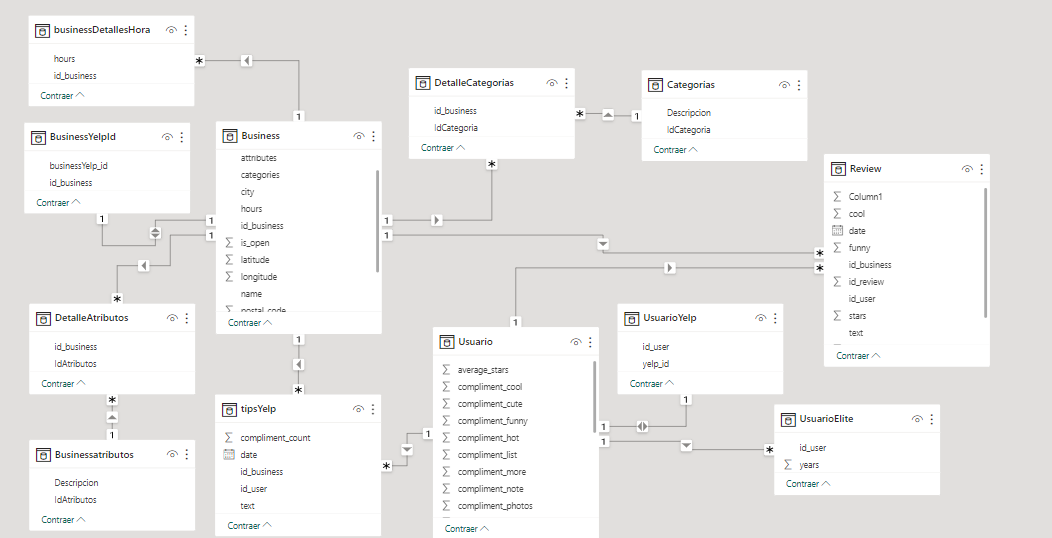